In [2]:
import matplotlib.pyplot as plt 
import mlflow
mlflow.set_tracking_uri("sqlite:///mlflow.db")
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
from utils import Load_Rumours_Dataset_filtering_since_first_post

### Transfer Learning - GAT Network

In [3]:
df_posts_by_time_cut = pd.read_csv('germanwings_crash_posts_by_time_cut.csv')
df_germanwings_crash = pd.read_csv("GAT Network 2024-12-21 2 layers germanwings crash.csv")
df_germanwings_crash['metrics.time_cut'] = df_germanwings_crash['metrics.time_cut'].astype('int')
df_germanwings_crash = df_germanwings_crash.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_germanwings_crash['metrics.test_recall'] = df_germanwings_crash['metrics.test_recall'].round(2)
df_germanwings_crash['metrics.test_precision'] = df_germanwings_crash['metrics.test_precision'].round(2)
df_germanwings_crash['time_cut_hours'] = round(df_germanwings_crash['time_cut']/60,2)

df_posts_by_time_cut = pd.read_csv('sydneysiege_posts_by_time_cut.csv')
df_sydney_siege = pd.read_csv("GAT Network 2024-12-21 2 layers sydneysiege.csv")
df_sydney_siege['metrics.time_cut'] = df_sydney_siege['metrics.time_cut'].astype('int')
df_sydney_siege['metrics.time_cut'] = df_sydney_siege['metrics.time_cut'].astype('int')
df_sydney_siege = df_sydney_siege.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_sydney_siege['metrics.test_recall'] = df_sydney_siege['metrics.test_recall'].round(2)
df_sydney_siege['metrics.test_precision'] = df_sydney_siege['metrics.test_precision'].round(2)
df_sydney_siege['time_cut_hours'] = round(df_sydney_siege['time_cut']/60,2)

df_posts_by_time_cut = pd.read_csv('ferguson_posts_by_time_cut.csv')
df_ferguson = pd.read_csv("GAT Network 2024-12-21 2 layers ferguson.csv")
df_ferguson['metrics.time_cut'] = df_ferguson['metrics.time_cut'].astype('int')
df_ferguson = df_ferguson.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_ferguson['metrics.test_recall'] = df_ferguson['metrics.test_recall'].round(2)
df_ferguson['metrics.test_precision'] = df_ferguson['metrics.test_precision'].round(2)
df_ferguson['time_cut_hours'] = round(df_ferguson['time_cut']/60,2)

df_posts_by_time_cut = pd.read_csv('ottawa_shooting_posts_by_time_cut.csv')
df_ottawa_shooting = pd.read_csv("GAT Network 2024-12-21 2 layers ottawashooting.csv")
df_ottawa_shooting['metrics.time_cut'] = df_ottawa_shooting['metrics.time_cut'].astype('int')
df_ottawa_shooting = df_ottawa_shooting.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_ottawa_shooting['metrics.test_recall'] = df_ottawa_shooting['metrics.test_recall'].round(2)
df_ottawa_shooting['metrics.test_precision'] = df_ottawa_shooting['metrics.test_precision'].round(2)
df_ottawa_shooting['time_cut_hours'] = round(df_ottawa_shooting['time_cut']/60,2)

df_germanwings_crash['model']='gat'
df_germanwings_crash['dataset']='germanwings_crash'
df_sydney_siege['model']='gat'
df_sydney_siege['dataset']='sydney_siege'
df_ferguson['model']='gat'
df_ferguson['dataset']='ferguson'
df_ottawa_shooting['model']='gat'
df_ottawa_shooting['dataset']='ottawa_shooting'
df_all_tl=  pd.concat([df_germanwings_crash,df_sydney_siege,df_ferguson,df_ottawa_shooting])

### Transfer Learning - HAN Network

In [4]:
df_posts_by_time_cut = pd.read_csv('germanwings_crash_posts_by_time_cut.csv')
df_germanwings_crash = pd.read_csv("HAN_Network_2024_12_29_2_layers_germanwings_crash.csv")
df_germanwings_crash['metrics.time_cut'] = df_germanwings_crash['metrics.time_cut'].astype('int')
df_germanwings_crash = df_germanwings_crash.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_germanwings_crash['metrics.test_recall'] = df_germanwings_crash['metrics.test_recall'].round(2)
df_germanwings_crash['metrics.test_precision'] = df_germanwings_crash['metrics.test_precision'].round(2)
df_germanwings_crash['time_cut_hours'] = round(df_germanwings_crash['time_cut']/60,2)

df_posts_by_time_cut = pd.read_csv('sydneysiege_posts_by_time_cut.csv')
df_sydney_siege = pd.read_csv("HAN_Network_2024_12_29_2_layers_sydneysiege.csv")
df_sydney_siege['metrics.time_cut'] = df_sydney_siege['metrics.time_cut'].astype('int')
df_sydney_siege['metrics.time_cut'] = df_sydney_siege['metrics.time_cut'].astype('int')
df_sydney_siege = df_sydney_siege.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_sydney_siege['metrics.test_recall'] = df_sydney_siege['metrics.test_recall'].round(2)
df_sydney_siege['metrics.test_precision'] = df_sydney_siege['metrics.test_precision'].round(2)
df_sydney_siege['time_cut_hours'] = round(df_sydney_siege['time_cut']/60,2)

df_posts_by_time_cut = pd.read_csv('ferguson_posts_by_time_cut.csv')
# Get the experiment ID or name
experiment_name = "HAN Network 2024-12-30 2 layers ferguson"  # Replace with your experiment name
experiment = mlflow.get_experiment_by_name(experiment_name)

if experiment is not None:
    experiment_id = experiment.experiment_id

    # Retrieve all runs in the experiment as a DataFrame
    df_ferguson = mlflow.search_runs(experiment_ids=[experiment_id]).dropna(subset='end_time')
    
    # Show the DataFrame
    #print(df)
else:
    print(f"Experiment '{experiment_name}' not found.")
df_ferguson['metrics.time_cut'] = df_ferguson['metrics.time_cut'].astype('int')
df_ferguson = df_ferguson.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_ferguson['metrics.test_recall'] = df_ferguson['metrics.test_recall'].round(2)
df_ferguson['metrics.test_precision'] = df_ferguson['metrics.test_precision'].round(2)
df_ferguson['time_cut_hours'] = round(df_ferguson['time_cut']/60,2)

df_posts_by_time_cut = pd.read_csv('ottawa_shooting_posts_by_time_cut.csv')
# Get the experiment ID or name
experiment_name = "HAN Network 2024-12-30 2 layers ottawashootingh"  # Replace with your experiment name
experiment = mlflow.get_experiment_by_name(experiment_name)

if experiment is not None:
    experiment_id = experiment.experiment_id

    # Retrieve all runs in the experiment as a DataFrame
    df_ottawa_shooting = mlflow.search_runs(experiment_ids=[experiment_id]).dropna()
    
    # Show the DataFrame
    #print(df)
else:
    print(f"Experiment '{experiment_name}' not found.")
df_ottawa_shooting['metrics.time_cut'] = df_ottawa_shooting['metrics.time_cut'].astype('int')
df_ottawa_shooting = df_ottawa_shooting.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_ottawa_shooting['metrics.test_recall'] = df_ottawa_shooting['metrics.test_recall'].round(2)
df_ottawa_shooting['metrics.test_precision'] = df_ottawa_shooting['metrics.test_precision'].round(2)
df_ottawa_shooting['time_cut_hours'] = round(df_ottawa_shooting['time_cut']/60,2)

df_germanwings_crash['model']='han'
df_germanwings_crash['dataset']='germanwings_crash'
df_sydney_siege['model']='han'
df_sydney_siege['dataset']='sydney_siege'
df_ferguson['model']='han'
df_ferguson['dataset']='ferguson'
df_ottawa_shooting['model']='han'
df_ottawa_shooting['dataset']='ottawa_shooting'
df_all_tl=  pd.concat([df_all_tl,df_germanwings_crash,df_sydney_siege,df_ferguson,df_ottawa_shooting])

#### XGBoost

In [5]:
df_posts_by_time_cut = pd.read_csv('germanwings_crash_posts_by_time_cut.csv')
# Get the experiment ID or name
experiment_name = "Xgboost SMOTE Filter Node 2024-12-28 Transfer Learning germanwings_crash"  # Replace with your experiment name
experiment = mlflow.get_experiment_by_name(experiment_name)

if experiment is not None:
    experiment_id = experiment.experiment_id

    # Retrieve all runs in the experiment as a DataFrame
    df_germanwings_crash = mlflow.search_runs(experiment_ids=[experiment_id])
    
    # Show the DataFrame
    #print(df)
else:
    print(f"Experiment '{experiment_name}' not found.")

df_germanwings_crash['metrics.time_cut'] = df_germanwings_crash['metrics.time_cut'].astype('int')
df_germanwings_crash = df_germanwings_crash.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_germanwings_crash['metrics.test_recall'] = df_germanwings_crash['metrics.test_recall'].round(2)
df_germanwings_crash['metrics.test_precision'] = df_germanwings_crash['metrics.test_precision'].round(2)
df_germanwings_crash['time_cut_hours'] = round(df_germanwings_crash['time_cut']/60,2)

df_posts_by_time_cut = pd.read_csv('sydneysiege_posts_by_time_cut.csv')
df_sydney_siege = pd.read_csv("Xgboost SMOTE Filter Node 2024-12-27 Transfer Learning sydneysiege.csv")
df_sydney_siege['metrics.time_cut'] = df_sydney_siege['metrics.time_cut'].astype('int')
df_sydney_siege['metrics.time_cut'] = df_sydney_siege['metrics.time_cut'].astype('int')
df_sydney_siege = df_sydney_siege.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_sydney_siege['metrics.test_recall'] = df_sydney_siege['metrics.test_recall'].round(2)
df_sydney_siege['metrics.test_precision'] = df_sydney_siege['metrics.test_precision'].round(2)
df_sydney_siege['time_cut_hours'] = round(df_sydney_siege['time_cut']/60,2)

df_posts_by_time_cut = pd.read_csv('ferguson_posts_by_time_cut.csv')
experiment_name = "Xgboost SMOTE Filter Node 2024-12-28 Transfer Learning ferguson"  # Replace with your experiment name
experiment = mlflow.get_experiment_by_name(experiment_name)

if experiment is not None:
    experiment_id = experiment.experiment_id

    # Retrieve all runs in the experiment as a DataFrame
    df_ferguson = mlflow.search_runs(experiment_ids=[experiment_id]).drop_duplicates()
    
    # Show the DataFrame
    #print(df)
else:
    print(f"Experiment '{experiment_name}' not found.")
df_ferguson['metrics.time_cut'] = df_ferguson['metrics.time_cut'].astype('int')
df_ferguson = df_ferguson.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_ferguson['metrics.test_recall'] = df_ferguson['metrics.test_recall'].round(2)
df_ferguson['metrics.test_precision'] = df_ferguson['metrics.test_precision'].round(2)
df_ferguson['time_cut_hours'] = round(df_ferguson['time_cut']/60,2)

df_posts_by_time_cut = pd.read_csv('ottawa_shooting_posts_by_time_cut.csv')
df_ottawa_shooting = pd.read_csv("Xgboost SMOTE Filter Node 2024-12-27 Transfer Learning ottawashooting.csv")
df_ottawa_shooting['metrics.time_cut'] = df_ottawa_shooting['metrics.time_cut'].astype('int')
df_ottawa_shooting = df_ottawa_shooting.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_ottawa_shooting['metrics.test_recall'] = df_ottawa_shooting['metrics.test_recall'].round(2)
df_ottawa_shooting['metrics.test_precision'] = df_ottawa_shooting['metrics.test_precision'].round(2)
df_ottawa_shooting['time_cut_hours'] = round(df_ottawa_shooting['time_cut']/60,2)

df_germanwings_crash['model']='xgboost'
df_germanwings_crash['dataset']='germanwings_crash'
df_sydney_siege['model']='xgboost'
df_sydney_siege['dataset']='sydney_siege'
df_ferguson['model']='xgboost'
df_ferguson['dataset']='ferguson'
df_ottawa_shooting['model']='xgboost'
df_ottawa_shooting['dataset']='ottawa_shooting'
df_all_tl=  pd.concat([df_all_tl,df_germanwings_crash,df_sydney_siege,df_ferguson,df_ottawa_shooting])

#### Random Forest

In [6]:
df_posts_by_time_cut = pd.read_csv('germanwings_crash_posts_by_time_cut.csv')
# Get the experiment ID or name
experiment_name = "Random Forest SMOTE Filter Node 2024-12-29 Transfer Learning Germanwings Crash"  # Replace with your experiment name
experiment = mlflow.get_experiment_by_name(experiment_name)

if experiment is not None:
    experiment_id = experiment.experiment_id

    # Retrieve all runs in the experiment as a DataFrame
    df_germanwings_crash = mlflow.search_runs(experiment_ids=[experiment_id])
    
    # Show the DataFrame
    #print(df)
else:
    print(f"Experiment '{experiment_name}' not found.")

df_germanwings_crash['metrics.time_cut'] = df_germanwings_crash['metrics.time_cut'].astype('int')
df_germanwings_crash = df_germanwings_crash.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_germanwings_crash['metrics.test_recall'] = df_germanwings_crash['metrics.test_recall'].round(2)
df_germanwings_crash['metrics.test_precision'] = df_germanwings_crash['metrics.test_precision'].round(2)
df_germanwings_crash['time_cut_hours'] = round(df_germanwings_crash['time_cut']/60,2)

df_posts_by_time_cut = pd.read_csv('sydneysiege_posts_by_time_cut.csv')
experiment_name = "Random Forest SMOTE Filter Node 2024-12-29 Transfer Learning sydney siege"  # Replace with your experiment name
experiment = mlflow.get_experiment_by_name(experiment_name)

if experiment is not None:
    experiment_id = experiment.experiment_id

    # Retrieve all runs in the experiment as a DataFrame
    df_sydney_siege = mlflow.search_runs(experiment_ids=[experiment_id]).drop_duplicates()
    
    # Show the DataFrame
    #print(df)
else:
    print(f"Experiment '{experiment_name}' not found.")
df_sydney_siege['metrics.time_cut'] = df_sydney_siege['metrics.time_cut'].astype('int')
df_sydney_siege['metrics.time_cut'] = df_sydney_siege['metrics.time_cut'].astype('int')
df_sydney_siege = df_sydney_siege.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_sydney_siege['metrics.test_recall'] = df_sydney_siege['metrics.test_recall'].round(2)
df_sydney_siege['metrics.test_precision'] = df_sydney_siege['metrics.test_precision'].round(2)
df_sydney_siege['time_cut_hours'] = round(df_sydney_siege['time_cut']/60,2)

df_posts_by_time_cut = pd.read_csv('ferguson_posts_by_time_cut.csv')
experiment_name = "Random Forest SMOTE Filter Node 2024-12-29 Transfer Learning ferguson"  # Replace with your experiment name
experiment = mlflow.get_experiment_by_name(experiment_name)

if experiment is not None:
    experiment_id = experiment.experiment_id

    # Retrieve all runs in the experiment as a DataFrame
    df_ferguson = mlflow.search_runs(experiment_ids=[experiment_id]).drop_duplicates()
    
    # Show the DataFrame
    #print(df)
else:
    print(f"Experiment '{experiment_name}' not found.")
df_ferguson['metrics.time_cut'] = df_ferguson['metrics.time_cut'].astype('int')
df_ferguson = df_ferguson.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_ferguson['metrics.test_recall'] = df_ferguson['metrics.test_recall'].round(2)
df_ferguson['metrics.test_precision'] = df_ferguson['metrics.test_precision'].round(2)
df_ferguson['time_cut_hours'] = round(df_ferguson['time_cut']/60,2)

df_posts_by_time_cut = pd.read_csv('ottawa_shooting_posts_by_time_cut.csv')
experiment_name = "Random Forest SMOTE Filter Node 2024-12-29 Transfer Learning Ottawa shooting"  # Replace with your experiment name
experiment = mlflow.get_experiment_by_name(experiment_name)

if experiment is not None:
    experiment_id = experiment.experiment_id

    # Retrieve all runs in the experiment as a DataFrame
    df_ottawa_shooting = mlflow.search_runs(experiment_ids=[experiment_id]).drop_duplicates()
    
    # Show the DataFrame
    #print(df)
else:
    print(f"Experiment '{experiment_name}' not found.")
df_ottawa_shooting['metrics.time_cut'] = df_ottawa_shooting['metrics.time_cut'].astype('int')
df_ottawa_shooting = df_ottawa_shooting.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_ottawa_shooting['metrics.test_recall'] = df_ottawa_shooting['metrics.test_recall'].round(2)
df_ottawa_shooting['metrics.test_precision'] = df_ottawa_shooting['metrics.test_precision'].round(2)
df_ottawa_shooting['time_cut_hours'] = round(df_ottawa_shooting['time_cut']/60,2)

df_germanwings_crash['model']='random forest'
df_germanwings_crash['dataset']='germanwings_crash'
df_sydney_siege['model']='random forest'
df_sydney_siege['dataset']='sydney_siege'
df_ferguson['model']='random forest'
df_ferguson['dataset']='ferguson'
df_ottawa_shooting['model']='random forest'
df_ottawa_shooting['dataset']='ottawa_shooting'
df_all_tl=  pd.concat([df_all_tl,df_germanwings_crash,df_sydney_siege,df_ferguson,df_ottawa_shooting])

#### LSTM

In [7]:
df_posts_by_time_cut = pd.read_csv('germanwings_crash_posts_by_time_cut.csv')
# Get the experiment ID or name
experiment_name = "LSTM SMOTE Filter Node 2025-02-22 Transfer Learning Germawings Crash"  # Replace with your experiment name
experiment = mlflow.get_experiment_by_name(experiment_name)

if experiment is not None:
    experiment_id = experiment.experiment_id

    # Retrieve all runs in the experiment as a DataFrame
    df_germanwings_crash = mlflow.search_runs(experiment_ids=[experiment_id]).dropna()
    
    # Show the DataFrame
    #print(df)
else:
    print(f"Experiment '{experiment_name}' not found.")

df_germanwings_crash['metrics.time_cut'] = df_germanwings_crash['metrics.time_cut'].astype('int')
df_germanwings_crash = df_germanwings_crash.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_germanwings_crash['metrics.test_recall'] = df_germanwings_crash['metrics.test_recall'].round(2)
df_germanwings_crash['metrics.test_precision'] = df_germanwings_crash['metrics.test_precision'].round(2)
df_germanwings_crash['time_cut_hours'] = round(df_germanwings_crash['time_cut']/60,2)

df_posts_by_time_cut = pd.read_csv('sydneysiege_posts_by_time_cut.csv')
experiment_name = "LSTM SMOTE Filter Node 2025-02-22 Transfer Learning sydneysiege"  # Replace with your experiment name
experiment = mlflow.get_experiment_by_name(experiment_name)

if experiment is not None:
    experiment_id = experiment.experiment_id

    # Retrieve all runs in the experiment as a DataFrame
    df_sydney_siege = mlflow.search_runs(experiment_ids=[experiment_id]).dropna()
    
    # Show the DataFrame
    #print(df)
else:
    print(f"Experiment '{experiment_name}' not found.")
df_sydney_siege['metrics.time_cut'] = df_sydney_siege['metrics.time_cut'].astype('int')
df_sydney_siege['metrics.time_cut'] = df_sydney_siege['metrics.time_cut'].astype('int')
df_sydney_siege = df_sydney_siege.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_sydney_siege['metrics.test_recall'] = df_sydney_siege['metrics.test_recall'].round(2)
df_sydney_siege['metrics.test_precision'] = df_sydney_siege['metrics.test_precision'].round(2)
df_sydney_siege['time_cut_hours'] = round(df_sydney_siege['time_cut']/60,2)

df_posts_by_time_cut = pd.read_csv('ferguson_posts_by_time_cut.csv')
experiment_name = "LSTM SMOTE Filter Node 2025-02-22 Transfer Learning ferguson"  # Replace with your experiment name
experiment = mlflow.get_experiment_by_name(experiment_name)

if experiment is not None:
    experiment_id = experiment.experiment_id

    # Retrieve all runs in the experiment as a DataFrame
    df_ferguson = mlflow.search_runs(experiment_ids=[experiment_id]).dropna()
    
    # Show the DataFrame
    #print(df)
else:
    print(f"Experiment '{experiment_name}' not found.")
df_ferguson['metrics.time_cut'] = df_ferguson['metrics.time_cut'].astype('int')
df_ferguson = df_ferguson.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_ferguson['metrics.test_recall'] = df_ferguson['metrics.test_recall'].round(2)
df_ferguson['metrics.test_precision'] = df_ferguson['metrics.test_precision'].round(2)
df_ferguson['time_cut_hours'] = round(df_ferguson['time_cut']/60,2)

df_posts_by_time_cut = pd.read_csv('ottawa_shooting_posts_by_time_cut.csv')
experiment_name = "LSTM SMOTE Filter Node 2025-02-22 Transfer Learning Ottawa shooting"  # Replace with your experiment name
experiment = mlflow.get_experiment_by_name(experiment_name)

if experiment is not None:
    experiment_id = experiment.experiment_id

    # Retrieve all runs in the experiment as a DataFrame
    df_ottawa_shooting = mlflow.search_runs(experiment_ids=[experiment_id]).dropna()
    
    # Show the DataFrame
    #print(df)
else:
    print(f"Experiment '{experiment_name}' not found.")
df_ottawa_shooting['metrics.time_cut'] = df_ottawa_shooting['metrics.time_cut'].astype('int')
df_ottawa_shooting = df_ottawa_shooting.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_ottawa_shooting['metrics.test_recall'] = df_ottawa_shooting['metrics.test_recall'].round(2)
df_ottawa_shooting['metrics.test_precision'] = df_ottawa_shooting['metrics.test_precision'].round(2)
df_ottawa_shooting['time_cut_hours'] = round(df_ottawa_shooting['time_cut']/60,2)

df_germanwings_crash['model']='lstm'
df_germanwings_crash['dataset']='germanwings_crash'
df_sydney_siege['model']='lstm'
df_sydney_siege['dataset']='sydney_siege'
df_ferguson['model']='lstm'
df_ferguson['dataset']='ferguson'
df_ottawa_shooting['model']='lstm'
df_ottawa_shooting['dataset']='ottawa_shooting'
df_all_tl=  pd.concat([df_all_tl,df_germanwings_crash,df_sydney_siege,df_ferguson,df_ottawa_shooting])

In [8]:
df_all_tl_grouped_recall = df_all_tl.groupby(['dataset','model'])[['metrics.test_recall']].agg(['mean', 'std'])\
                            ['metrics.test_recall'].reset_index().round(2)

In [9]:
df_all_tl_grouped_recall.sort_values(by=['dataset','mean'],ascending=False)

,dataset,model,mean,std
19,sydney_siege,xgboost,0.88,0.03
18,sydney_siege,random forest,0.78,0.06
16,sydney_siege,han,0.77,0.04
15,sydney_siege,gat,0.76,0.04
17,sydney_siege,lstm,0.68,0.15
14,ottawa_shooting,xgboost,0.79,0.06
10,ottawa_shooting,gat,0.77,0.02
11,ottawa_shooting,han,0.77,0.03
13,ottawa_shooting,random forest,0.77,0.08
12,ottawa_shooting,lstm,0.68,0.10


In [10]:
df_all_tl_grouped_precision = df_all_tl.groupby(['dataset','model'])[['metrics.test_precision']].agg(['mean', 'std'])\
                            ['metrics.test_precision'].reset_index().round(2)

In [11]:
df_all_tl_grouped_precision.sort_values(by=['dataset','mean'],ascending=False)

,dataset,model,mean,std
15,sydney_siege,gat,0.77,0.04
16,sydney_siege,han,0.77,0.04
18,sydney_siege,random forest,0.69,0.07
17,sydney_siege,lstm,0.66,0.08
19,sydney_siege,xgboost,0.62,0.07
13,ottawa_shooting,random forest,0.82,0.02
14,ottawa_shooting,xgboost,0.82,0.02
11,ottawa_shooting,han,0.80,0.02
10,ottawa_shooting,gat,0.79,0.02
12,ottawa_shooting,lstm,0.78,0.03


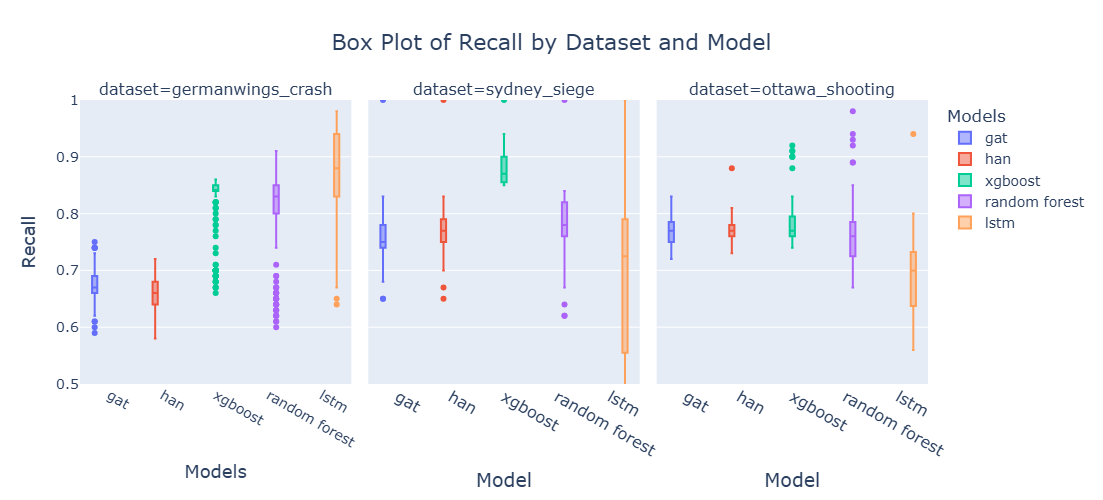

In [14]:
import plotly.express as px

# Filter the dataframe for only the recall metric
df_recall = df_all_tl[(df_all_tl['metrics.test_recall'].notnull()) & (df_all_tl.dataset != 'ferguson')]

# Create a Plotly figure for each dataset
fig = px.box(
    df_recall,
    x='model',
    y='metrics.test_recall',
    color='model',
    facet_col='dataset',
    boxmode='group',
    title="Box Plot of Recall by Dataset and Model",
    labels={'metrics.test_recall': 'Recall', 'model': 'Model'}
)

# Update layout for better visualization and readability
fig.update_layout(
    title="Box Plot of Recall by Dataset and Model",  
    title_x=0.5,  
    width=1200,  
    height=500,  
    font=dict(size=16),  
    xaxis=dict(title="Models", title_font=dict(size=18), tickfont=dict(size=14)),
    yaxis=dict(
        title="Recall", 
        title_font=dict(size=18), 
        tickfont=dict(size=14),
        range=[0.5, 1]  # Adjust this range to push boxes higher
    ),
    legend=dict(title="Models", font=dict(size=14))  
)

# Show the plot
fig.show()


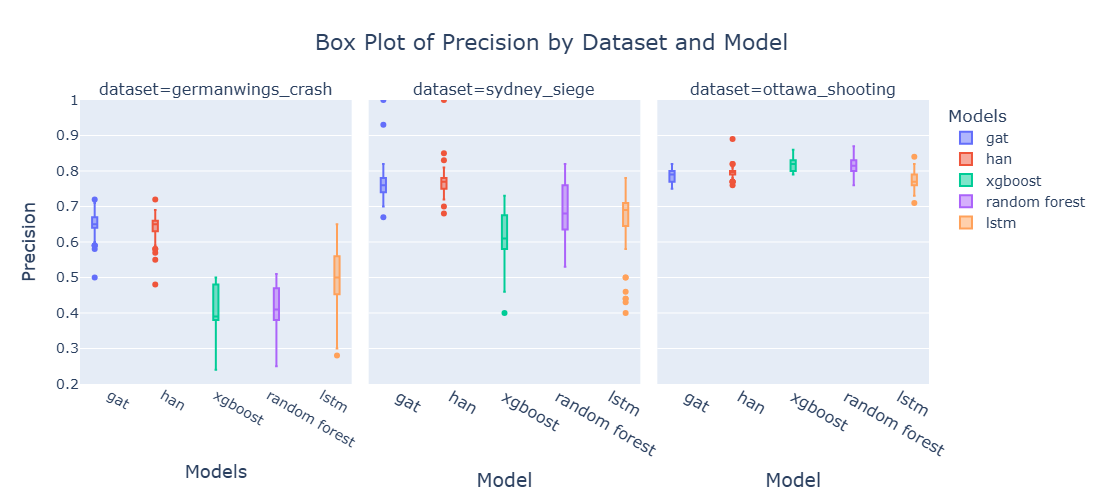

In [17]:
import plotly.express as px

# Filter the dataframe for only the precision metric
df_recall = df_all_tl[(df_all_tl['metrics.test_precision'].notnull()) & (df_all_tl.dataset != 'ferguson')]

# Create a Plotly figure for each dataset
fig = px.box(
    df_recall,
    x='model',
    y='metrics.test_precision',
    color='model',
    facet_col='dataset',
    boxmode='group',
    title="Box Plot of Precision by Dataset and Model",
    labels={'metrics.test_precision': 'Precision', 'model': 'Model'}
)

# Update layout for better visualization and readability
fig.update_layout(
    title="Box Plot of Precision by Dataset and Model",  
    title_x=0.5,  
    width=1200,  
    height=500,  
    font=dict(size=16),  
    xaxis=dict(title="Models", title_font=dict(size=18), tickfont=dict(size=14)),
    yaxis=dict(
        title="Precision", 
        title_font=dict(size=18), 
        tickfont=dict(size=14),
        range=[0.2, 1]  # Adjust this range to push boxes higher
    ),
    legend=dict(title="Models", font=dict(size=14))  
)

# Show the plot
fig.show()
